![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 3
##### Isidre Munné-Bertran

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [21]:
# Library keepers
import pandas as pd
import numpy as np

# New ones for this LAB
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings. HURRAY !!!!

In [22]:
df = pd.read_csv('marketing_customer_analysis.csv')

### 1. Show DataFrame info.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In this dataset we have `9134` entries in `24` columns.

In [24]:
df.sample(5) # Let's get information from 5 random rows

Customer       State  Customer Lifetime Value Response  Coverage  \
4731  BT20606     Arizona              5837.528088       No     Basic   
8352  RN12107      Oregon              9476.901955       No   Premium   
8147  PC72443      Oregon              4529.072491       No   Premium   
3884  OQ99704  Washington              3981.775889       No     Basic   
8721  SC23927  California              4772.943848      Yes  Extended   

                 Education Effective To Date EmploymentStatus Gender  Income  \
4731                Doctor           1/10/11         Employed      M   83308   
8352  High School or Below            1/4/11       Unemployed      F       0   
8147               College           2/20/11         Employed      F   94757   
3884              Bachelor           2/11/11         Employed      F   52801   
8721  High School or Below           2/18/11          Retired      M   20993   

     Location Code Marital Status  Monthly Premium Auto  \
4731      Suburban        Married                    73   
8352      Suburban         Single                   254   
8147         Rural        Married                   112   
3884         Urban        Married                   100   
8721      Suburban       Divorced                   133   

      Months Since Last Claim  Months Since Policy Inception  \
4731                        3                             81   
8352                       23                             55   
8147                        0                             25   
3884                       21                             78   
8721                       35                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
4731                          1                   7   Personal Auto   
8352                          0                   1  Corporate Auto   
8147                          0                   1   Personal Auto   
3884                          0                   1   Personal Auto   
8721                          0                   1   Personal Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
4731   Personal L2           Offer3         Agent          419.471438   
8352  Corporate L1           Offer1   Call Center         1828.800000   
8147   Personal L3           Offer3         Agent            5.453269   
3884   Personal L3           Offer2        Branch          475.200880   
8721   Personal L2           Offer2         Agent          638.400000   

      Vehicle Class Vehicle Size  
4731  Four-Door Car      Medsize  
8352     Luxury Car      Medsize  
8147  Four-Door Car      Medsize  
3884            SUV        Small  
8721            SUV      Medsize

### 2. Describe DataFrame.

In [25]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

### EXTRA:  Cleaning the datasetcolumns (standarize the names)

In [26]:
df.columns = cc = [column.lower().replace(' ', '_') for column in df]

In [27]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Beautiful 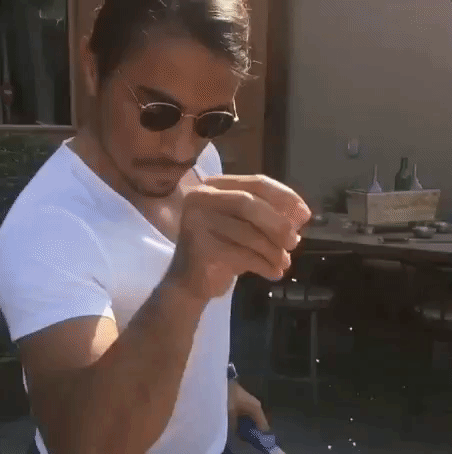

### 3. Show a plot of the total number of responses.

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

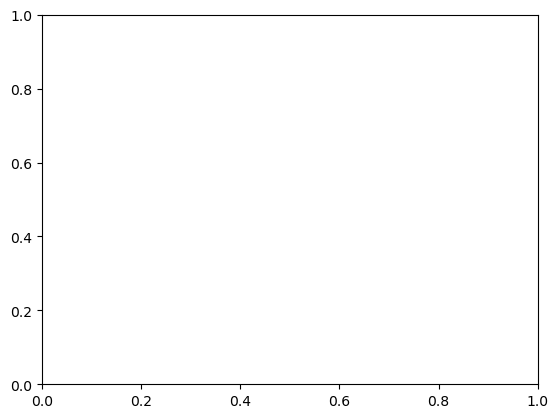

In [32]:
plt.boxplot(df['response'])

### 4. Show a plot of the response rate by the sales channel.

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

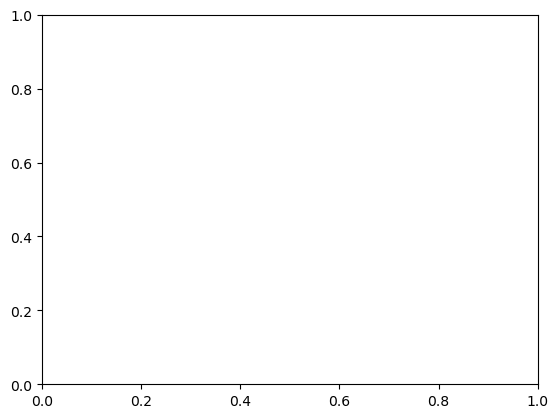

In [31]:
plt.boxplot(df['sales_channel'])

### 5. Show a plot of the response rate by the total claim amount.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9a23b6670>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9a23b6c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9a23b64c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9a23d01f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9a23d04c0>],
 'means': []}

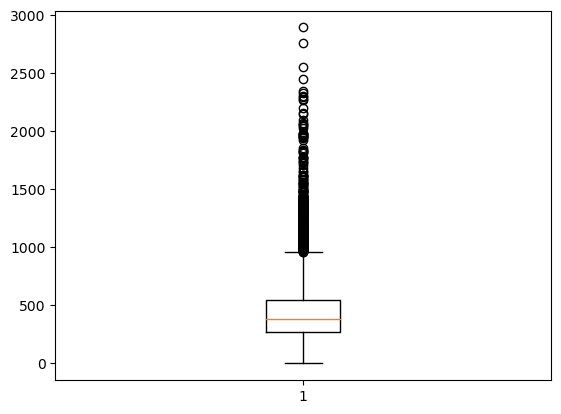

In [30]:
plt.boxplot(df['total_claim_amount'])

### 6. Show a plot of the response rate by income.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9a2e4f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9a2e4fc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9a2e4f400>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9a2e5b280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9a2e5b550>],
 'means': []}

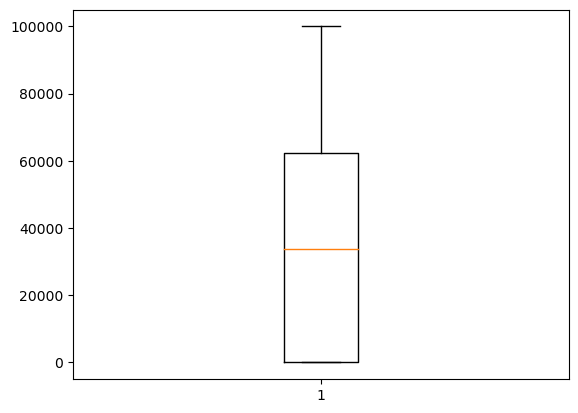

In [33]:
plt.boxplot(df['income'])